# Predicting Lung Cancer using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capabel of predicting whether or not someone's risk with lung cancer based on their medical attributes.

We're going to take the following approach:


1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


# 1. Problem Definition

Given clinical parameters about a patient, can we predict the risk of having lung cancer?

# 2. Data
The original data came from Kaggle
https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

# 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

### About this file

This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels , weight loss , shortness of breath , wheezing , swallowing difficulty , clubbing of finger nails , frequent colds , dry coughs , and snoring. By analyzing this data we can gain insight into what causes lung cancer and how best to treat it

1. Age: The age of the patient. (Numeric)
2. Gender: The gender of the patient. (Categorical)
3.  Air Pollution: The level of air pollution exposure of the patient. (Categorical)
4.  Alcohol use: The level of alcohol use of the patient. (Categorical)
5.  Dust Allergy: The level of dust allergy of the patient. (Categorical)
6.  OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
7.  Genetic Risk: The level of genetic risk of the patient. (Categorical)
8.  Chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
9.  Balanced Diet: The level of balanced diet of the patient. (Categorical)
10.  Obesity: The level of obesity of the patient. (Categorical)
11.  Smoking: The level of smoking of the patient. (Categorical)
12.  Passive Smoker: The level of passive smoker of the patient. (Categorical)
13.  Chest Pain: The level of chest pain of the patient. (Categorical)
14.  Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
15.  Fatigue: The level of fatigue of the patient. (Categorical)
16.  Weight Loss: The level of weight loss of the patient. (Categorical)
17.  Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
18.  Wheezing: The level of wheezing of the patient. (Categorical)
19.  Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
20.  Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

# Preparing the toolsWe're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [3]:
# Import all the tools we need

!pip install seaborn

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
# we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.4 MB/s eta 0:00:0000:0100:01


In [15]:
df = pd.read_csv("cancer patient data sets.csv")
df.shape # (rows, columns)

(1000, 26)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1.  What question(s) are you trying to solve?
2.  What kind of data do we have and how do we treat different types?
3.  What's missing from the data and how do you deal with it?
4.  Where are the outliers and why should you care about them?
5.  How can you add, change or remove features to get more out of your data?

In [16]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [17]:
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [18]:
# Create a dictionary mapping to fit DF.
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply mapping to the "Level" column
df['Level'] = df['Level'].map(level_mapping)

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_file_lung_cancer.csv', index=False)

In [19]:
# Extract the numeric part of the Patient Id column and convert it to float
df['Patient Id'] = df['Patient Id'].str.replace('P', '').astype(float).astype(int)

In [21]:
# Checking adjusted data set

df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,3
3,3,1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,3
4,4,101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,3


In [22]:
# Let's find out how many of each class there
df["Level"].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

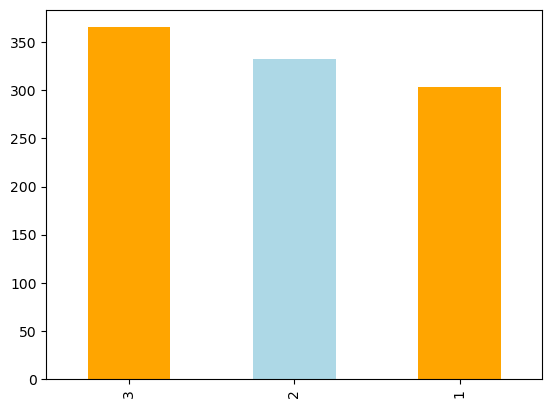

In [36]:
df["Level"].value_counts().plot(kind="bar", color=["orange", "lightblue"]);

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   index                     1000 non-null   int64
 1   Patient Id                1000 non-null   int64
 2   Age                       1000 non-null   int64
 3   Gender                    1000 non-null   int64
 4   Air Pollution             1000 non-null   int64
 5   Alcohol use               1000 non-null   int64
 6   Dust Allergy              1000 non-null   int64
 7   OccuPational Hazards      1000 non-null   int64
 8   Genetic Risk              1000 non-null   int64
 9   chronic Lung Disease      1000 non-null   int64
 10  Balanced Diet             1000 non-null   int64
 11  Obesity                   1000 non-null   int64
 12  Smoking                   1000 non-null   int64
 13  Passive Smoker            1000 non-null   int64
 14  Chest Pain                1000 non-null  

In [25]:
# Are there any missing values?
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [27]:
df.describe().astype(int)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,499,500,37,1,3,4,5,4,4,4,...,3,3,4,3,3,3,3,3,2,2
std,288,288,12,0,2,2,1,2,2,1,...,2,2,2,2,2,2,1,2,1,0
min,0,1,14,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
25%,249,250,27,1,2,2,4,3,2,3,...,2,2,2,2,2,2,2,2,2,1
50%,499,500,36,1,3,5,6,5,5,4,...,3,3,4,4,4,4,3,4,3,2
75%,749,750,45,2,6,7,7,7,7,6,...,5,6,6,5,5,5,5,6,4,3
max,999,1000,73,2,8,8,8,8,7,7,...,9,8,9,8,8,9,7,7,7,3


## Risk of lung cancel according to Gender

In [28]:
df.Gender.value_counts()

1    598
2    402
Name: Gender, dtype: int64

In [30]:
# Compare target column with sex column
pd.crosstab(df.Level, df.Gender)

Gender,1,2
Level,,
1,149,154
2,197,135
3,252,113


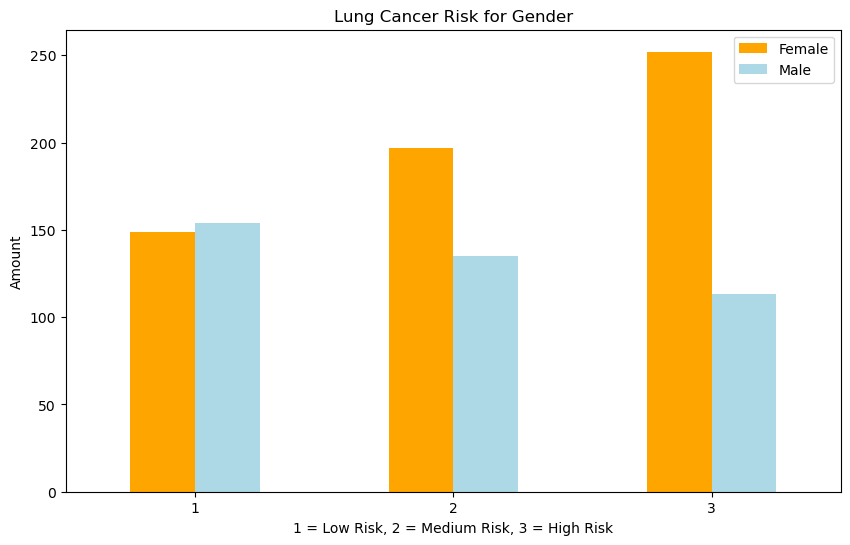

In [40]:
# Create a plot of crosstab
pd.crosstab(df.Level, df.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["orange", "lightblue"])

plt.title("Lung Cancer Risk for Gender")
plt.xlabel("1 = Low Risk, 2 = Medium Risk, 3 = High Risk")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Age vs. Genetic Risk for Lung cancer risk

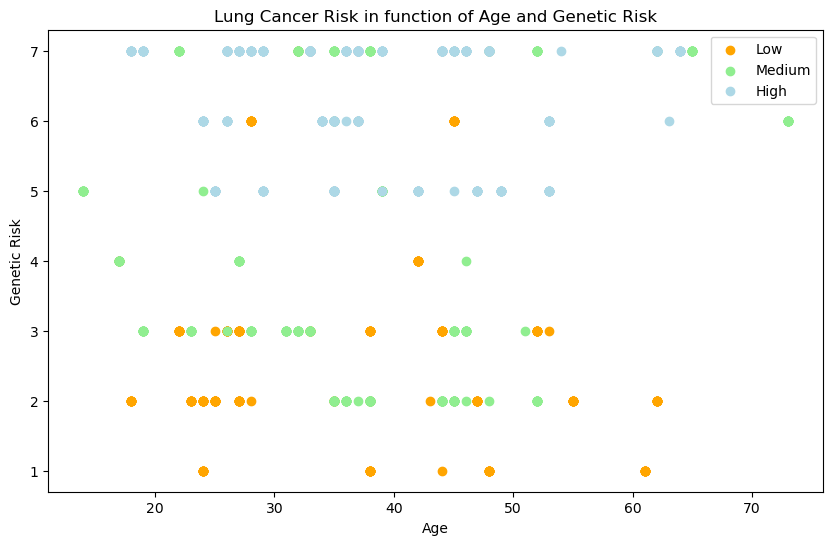

In [113]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with high risk examples
plt.scatter(df.Age[df.Level==1],
            df["Genetic Risk"][df.Level==1],
            c="orange")

# Scatter with medium risk examples
plt.scatter(df.Age[df.Level==2],
            df["Genetic Risk"][df.Level==2],
            c="lightgreen")

# Scatter with high risk examples
plt.scatter(df.Age[df.Level==3],
            df["Genetic Risk"][df.Level==3],
            c="lightblue")

# Add some helpful info 
plt.title("Lung Cancer Risk in function of Age and Genetic Risk")
plt.xlabel("Age")
plt.ylabel("Genetic Risk")
plt.legend(["Low", "Medium", "High"])


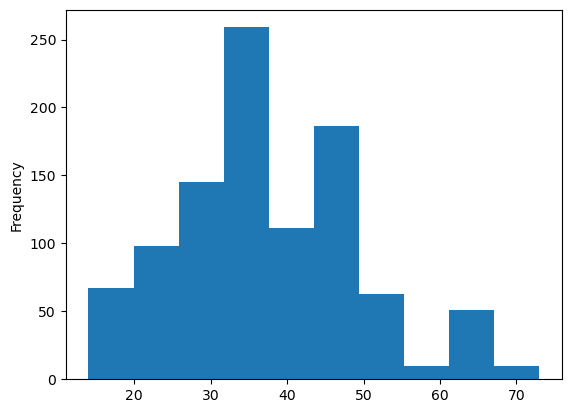

In [59]:
# Check the distribution of the age column with a histogram
df.Age.plot.hist();

## Risk of Lung Cancer due to Air Pollution

In [192]:
pd.crosstab(df["Air Pollution"], df["Level"])

Level,1,2,3
Air Pollution,,,
1,40,101,0
2,111,70,20
3,112,61,0
4,20,20,50
5,10,10,0
6,10,70,246
7,0,0,30
8,0,0,19


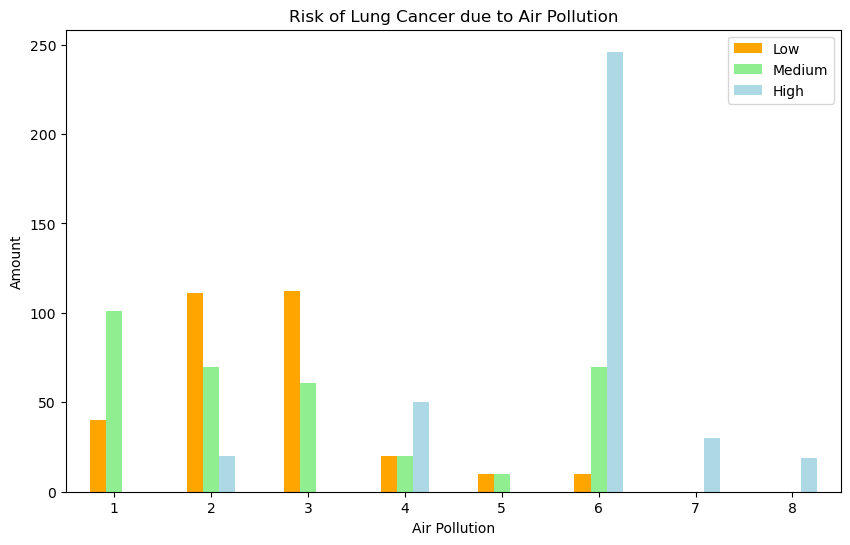

In [112]:
# Make the crosstab more visual
pd.crosstab(df["Air Pollution"], df["Level"]).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["orange", "lightgreen", "lightblue"])

# Add some communication
plt.title("Risk of Lung Cancer due to Air Pollution")
plt.xlabel("Air Pollution")
plt.ylabel("Amount")
plt.legend(["Low", "Medium", "High"])
plt.xticks(rotation=0);


In [71]:
# Make a correlation matrix
df.corr()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic_Lung_Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,1.000000,0.819939,0.002674,-0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,...,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957,0.057758
Patient Id,0.819939,1.000000,-0.004965,-0.027491,0.016286,0.009920,0.010107,0.007766,0.004036,0.004247,...,0.015178,0.013003,0.011128,0.003604,0.003812,0.009476,0.024152,0.001133,-0.003427,0.019987
Age,0.002674,-0.004965,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.025739,-0.027491,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.053307,0.016286,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.041374,0.009920,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.037960,0.010107,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.032355,0.007766,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.030725,0.004036,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic_Lung_Disease,0.025177,0.004247,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971


In [75]:
# Adding missing tools
!pip install xgboost

import xgboost as xgb

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.4 MB/s eta 0:00:0000:0100:01


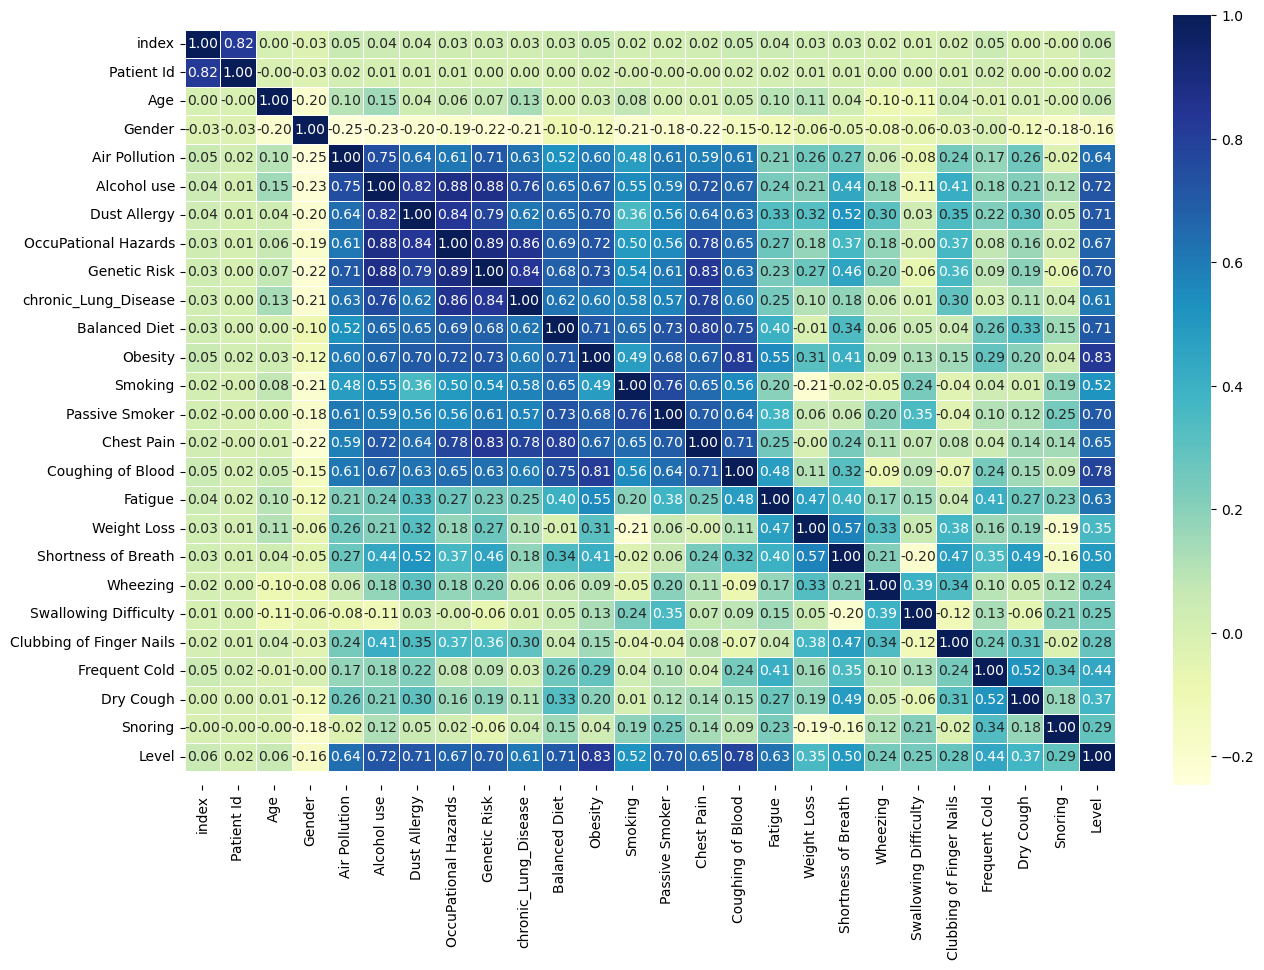

In [84]:
# Let's make our correlation matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [85]:
# Split data into X and y
X = df.drop("Level", axis=1)

y = df["Level"]

In [88]:
X

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic_Lung_Disease,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,1,33,1,2,4,5,4,3,2,...,4,3,4,2,2,3,1,2,3,4
1,1,10,17,1,3,1,5,3,4,2,...,3,1,3,7,8,6,2,1,7,2
2,2,100,35,1,4,5,6,5,5,4,...,8,8,7,9,2,1,4,6,7,2
3,3,1000,37,1,7,7,7,7,6,7,...,8,4,2,3,1,4,5,6,7,5
4,4,101,46,1,6,8,7,7,7,6,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,44,1,6,7,7,7,7,6,...,7,5,3,2,7,8,2,4,5,3
996,996,996,37,2,6,8,7,7,7,6,...,7,9,6,5,7,2,4,3,1,4
997,997,997,25,2,4,5,6,5,5,4,...,8,8,7,9,2,1,4,6,7,2
998,998,998,18,2,6,8,7,7,7,6,...,9,3,2,4,1,4,2,4,2,3


In [89]:
y

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64

In [90]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [91]:
X_train

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic_Lung_Disease,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
29,29,124,28,2,1,6,7,5,3,2,...,2,3,3,7,7,4,8,7,7,5
535,535,580,53,1,6,8,7,7,6,7,...,6,5,2,5,2,3,2,1,7,6
695,695,724,28,2,1,6,7,5,3,2,...,2,3,3,7,7,4,8,7,7,5
557,557,60,62,1,6,8,7,7,7,6,...,3,2,7,6,5,1,9,3,4,2
836,836,851,38,1,2,3,5,2,1,1,...,4,2,1,3,4,6,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,194,33,1,6,7,7,7,7,7,...,7,8,5,7,6,7,8,7,6,2
270,270,341,24,2,1,2,2,3,2,4,...,1,1,1,1,2,3,4,5,2,1
860,860,873,36,2,2,1,5,3,2,3,...,4,6,7,2,5,8,1,3,2,3
435,435,490,49,1,6,5,6,5,5,4,...,8,8,7,9,2,1,4,6,7,2


In [92]:
y_train, len(y_train)

(29     2
 535    3
 695    2
 557    2
 836    1
       ..
 106    3
 270    1
 860    2
 435    3
 102    3
 Name: Level, Length: 800, dtype: int64,
 800)

Now the data split into training and test sets, it's time to build a machine learning model.

I'll train it (find the patterns) on the training set.

And I'll test it (use the patterns) on the test set.

I am going to try 3 different machine learning models:

1.  Logistic Regression
2.  K-Nearest Neighbours Classifier
3.  Random Forest Classifier


In [189]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [190]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.99, 'KNN': 0.875, 'Random Forest': 1.0}

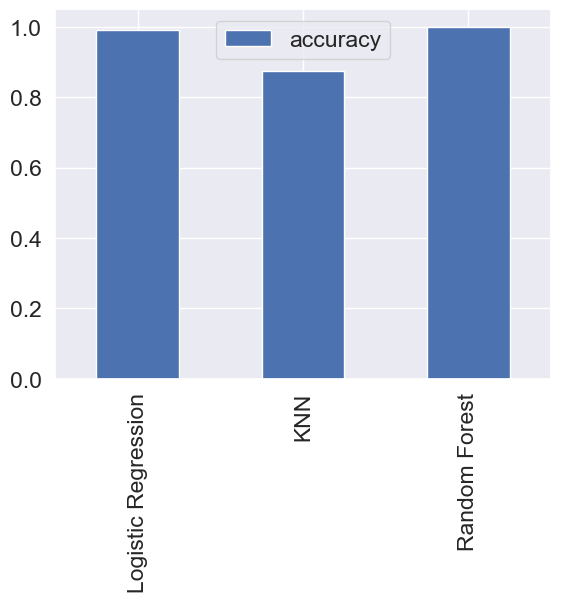

In [191]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


##  Hyperparameter tuning (by hand)

In [127]:
# Tuning KNN which happened to be the lowest of the 3 at 0.875

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [128]:
train_scores

[1.0,
 0.9025,
 0.92875,
 0.9125,
 0.91125,
 0.8975,
 0.9,
 0.87625,
 0.87375,
 0.855,
 0.8475,
 0.835,
 0.82875,
 0.81875,
 0.81875,
 0.80875,
 0.80875,
 0.80375,
 0.8,
 0.79625]

In [129]:
test_scores

[0.86,
 0.825,
 0.87,
 0.84,
 0.875,
 0.855,
 0.86,
 0.845,
 0.85,
 0.845,
 0.84,
 0.83,
 0.835,
 0.815,
 0.82,
 0.81,
 0.81,
 0.805,
 0.8,
 0.81]

Maximum KNN score on the test data: 87.50%


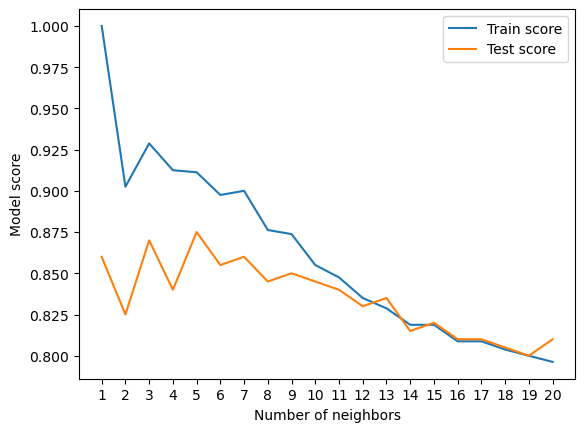

In [130]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Best KNN score at 87.50%

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [131]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### Now the Hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [182]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=1000),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'max_iter': [1000],
                                        'solver': ['liblinear']},
                   verbose=True)

In [183]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 1000, 'C': 2807.2162039411755}

In [184]:
rs_log_reg.score(X_test, y_test)

1.0

 Logistic Regression was .99, now it's at 1.

### Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [135]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [136]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [137]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

1.0

## Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [142]:

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"],
                "max_iter": [1000]}  # Increase the maximum number of iterations

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [143]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 32.90344562312671, 'max_iter': 1000, 'solver': 'liblinear'}

In [144]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

1.0

# Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first is to make predictions.

In [145]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [146]:
y_preds

array([2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 3, 3, 3, 3, 2,
       1, 2, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 1, 3, 3, 1, 2,
       2, 1, 1, 2, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2,
       3, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 1,
       3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 1, 2,
       1, 3, 2, 1, 2, 3, 2, 2, 1, 2, 1, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1, 3,
       1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3,
       2, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3, 2, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3,
       1, 2])

In [147]:
y_test

521    2
737    2
740    2
660    3
411    2
      ..
408    2
332    3
208    3
613    1
78     2
Name: Level, Length: 200, dtype: int64

In [169]:
from sklearn.metrics import classification_report

# Get predicted labels from the model
y_pred = gs_log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



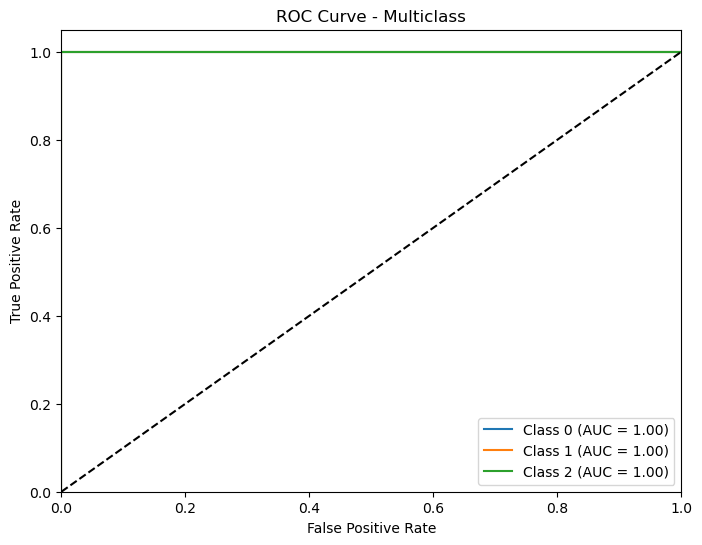

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_probs = gs_log_reg.predict_proba(X_test)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multiclass")
plt.legend(loc="lower right")
plt.show()

In [175]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


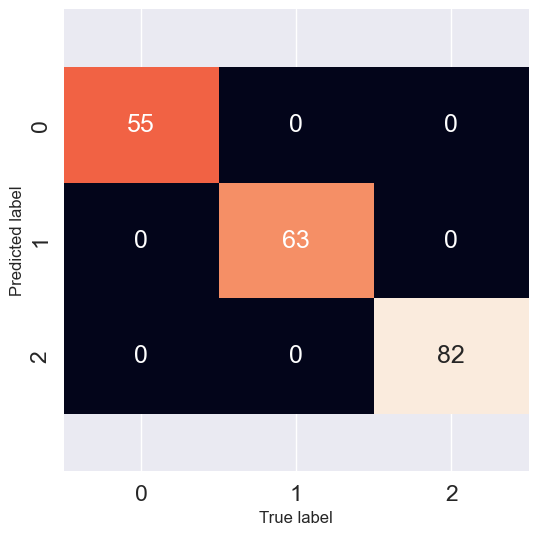

In [179]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label", fontsize=12)
    plt.ylabel("Predicted label", fontsize=12)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [181]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [193]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 32.90344562312671, 'max_iter': 1000, 'solver': 'liblinear'}

In [194]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=32.90344562312671,
                         solver="liblinear")

In [195]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([1.   , 0.995, 0.995, 1.   , 1.   ])

In [196]:
cv_acc = np.mean(cv_acc)
cv_acc

0.998

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, make_scorer

# Define the scoring metric with 'micro' average
scoring = make_scorer(precision_score, average='micro')

# Calculate cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring=scoring)
cv_precision = np.mean(cv_precision)

print("Cross-validated precision:", cv_precision)

Cross-validated precision: 0.998


In [209]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1_macro")
cv_f1 = np.mean(cv_f1)

print("Cross-validated f1-score:", cv_f1)

Cross-validated f1-score: 0.9979433037532832


## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [214]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [215]:
# Check coef_
clf.coef_

array([[-8.82926951e-05,  1.56926088e-03,  7.64568335e-02,
         1.98269288e+00,  3.07522307e-01, -7.16110235e-01,
         1.25578899e-01,  6.96108657e-01, -1.16692171e+00,
         9.36202491e-02,  1.70554441e-01, -5.05475351e-01,
         4.91169227e-01, -4.94729696e-01,  3.47739963e-01,
        -5.27040746e-02, -1.52705993e+00,  7.50823589e-01,
        -2.57221915e-01, -2.40139638e-03, -5.97919569e-01,
        -7.64805118e-01, -7.88646498e-02,  8.48388513e-02,
         2.21658992e-01],
       [ 3.93309301e-04, -9.72201084e-04,  1.20993036e-02,
        -1.03779013e+00, -9.37481459e-01, -2.21398469e-01,
         1.15051895e+00, -5.96412889e-01,  6.29136903e-01,
         2.14129582e-01, -2.12367827e-01,  2.22043576e-01,
        -3.89441806e-01, -2.54197132e-01, -5.33384624e-02,
        -1.57541277e-01, -3.01389379e-01,  5.60289199e-03,
         7.63298426e-02,  2.44565353e-01,  1.60457805e-01,
         3.13710768e-01,  1.95649356e-01, -3.47712622e-01,
         5.55200545e-01],
    

In [216]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'index': -8.829269511162786e-05,
 'Patient Id': 0.0015692608775553065,
 'Age': 0.07645683347205824,
 'Gender': 1.9826928767333074,
 'Air Pollution': 0.30752230658831015,
 'Alcohol use': -0.7161102348184548,
 'Dust Allergy': 0.12557889872995437,
 'OccuPational Hazards': 0.696108656805798,
 'Genetic Risk': -1.1669217115445516,
 'chronic_Lung_Disease': 0.0936202491276781,
 'Balanced Diet': 0.17055444140817702,
 'Obesity': -0.5054753513818638,
 'Smoking': 0.4911692273009565,
 'Passive Smoker': -0.4947296956552106,
 'Chest Pain': 0.34773996312802896,
 'Coughing of Blood': -0.05270407461221462,
 'Fatigue': -1.527059934265824,
 'Weight Loss': 0.7508235890083268,
 'Shortness of Breath': -0.25722191477426853,
 'Wheezing': -0.0024013963780521105,
 'Swallowing Difficulty': -0.5979195686297192,
 'Clubbing of Finger Nails': -0.7648051181555295,
 'Frequent Cold': -0.0788646497525707,
 'Dry Cough': 0.08483885133574766,
 'Snoring': 0.22165899153244994}

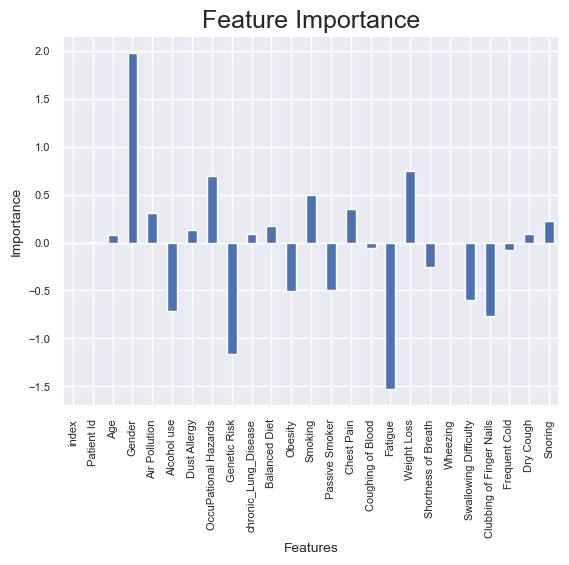

In [218]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
ax = feature_df.T.plot.bar(title="Feature Importance", legend=False)

# Reduce font size
ax.set_xlabel("Features", fontsize=10)
ax.set_ylabel("Importance", fontsize=10)
ax.tick_params(axis='both', which='both', labelsize=8)

plt.show()

In [220]:
pd.crosstab(df["Gender"], df["Level"])

Level,1,2,3
Gender,,,
1,149,197,252
2,154,135,113


In [221]:
pd.crosstab(df["Fatigue"], df["Level"])

Level,1,2,3
Fatigue,,,
1,80,30,0
2,111,70,30
3,92,60,60
4,20,102,58
5,0,20,69
6,0,50,0
8,0,0,109
9,0,0,39


In [222]:
pd.crosstab(df["Genetic Risk"], df["Level"])

Level,1,2,3
Genetic Risk,,,
1,40,0,0
2,121,91,0
3,92,81,0
4,20,20,0
5,0,20,80
6,20,20,68
7,10,100,217


In [223]:
pd.crosstab(df["Weight Loss"], df["Level"])

Level,1,2,3
Weight Loss,,,
1,80,41,0
2,122,40,118
3,40,70,40
4,31,10,19
5,10,51,39
6,10,0,39
7,0,120,110
8,10,0,0


## Let's try catboost and xgboost

In [225]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 42.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 51.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [226]:
import catboost as cb

model = cb.CatBoostClassifier()  # For classification
model.fit(X_train, y_train)
predictions = model.predict(X_test)


Learning rate set to 0.078231
0:	learn: 0.9843713	total: 59.6ms	remaining: 59.6s
1:	learn: 0.8845669	total: 61.2ms	remaining: 30.6s
2:	learn: 0.8002865	total: 63.2ms	remaining: 21s
3:	learn: 0.7245898	total: 64.6ms	remaining: 16.1s
4:	learn: 0.6613221	total: 66ms	remaining: 13.1s
5:	learn: 0.6057744	total: 67.4ms	remaining: 11.2s
6:	learn: 0.5559620	total: 69ms	remaining: 9.78s
7:	learn: 0.5126447	total: 70.4ms	remaining: 8.73s
8:	learn: 0.4720633	total: 71.7ms	remaining: 7.9s
9:	learn: 0.4397490	total: 73.3ms	remaining: 7.25s
10:	learn: 0.4054706	total: 74.9ms	remaining: 6.73s
11:	learn: 0.3769081	total: 76.2ms	remaining: 6.27s
12:	learn: 0.3482705	total: 77.7ms	remaining: 5.9s
13:	learn: 0.3269153	total: 79ms	remaining: 5.56s
14:	learn: 0.3083380	total: 81.2ms	remaining: 5.33s
15:	learn: 0.2892181	total: 82.4ms	remaining: 5.07s
16:	learn: 0.2713884	total: 83.7ms	remaining: 4.84s
17:	learn: 0.2529280	total: 85ms	remaining: 4.63s
18:	learn: 0.2359074	total: 86.2ms	remaining: 4.45s
19:	

190:	learn: 0.0046992	total: 403ms	remaining: 1.71s
191:	learn: 0.0046639	total: 404ms	remaining: 1.7s
192:	learn: 0.0046246	total: 415ms	remaining: 1.74s
193:	learn: 0.0045908	total: 426ms	remaining: 1.77s
194:	learn: 0.0045511	total: 428ms	remaining: 1.76s
195:	learn: 0.0045216	total: 430ms	remaining: 1.76s
196:	learn: 0.0044944	total: 431ms	remaining: 1.76s
197:	learn: 0.0044586	total: 433ms	remaining: 1.75s
198:	learn: 0.0044279	total: 435ms	remaining: 1.75s
199:	learn: 0.0043957	total: 436ms	remaining: 1.75s
200:	learn: 0.0043660	total: 438ms	remaining: 1.74s
201:	learn: 0.0043348	total: 439ms	remaining: 1.73s
202:	learn: 0.0043102	total: 440ms	remaining: 1.73s
203:	learn: 0.0042799	total: 442ms	remaining: 1.72s
204:	learn: 0.0042526	total: 443ms	remaining: 1.72s
205:	learn: 0.0042230	total: 445ms	remaining: 1.71s
206:	learn: 0.0041964	total: 446ms	remaining: 1.71s
207:	learn: 0.0041677	total: 447ms	remaining: 1.7s
208:	learn: 0.0041358	total: 448ms	remaining: 1.7s
209:	learn: 0.0

358:	learn: 0.0020358	total: 800ms	remaining: 1.43s
359:	learn: 0.0020293	total: 802ms	remaining: 1.43s
360:	learn: 0.0020219	total: 804ms	remaining: 1.42s
361:	learn: 0.0020136	total: 805ms	remaining: 1.42s
362:	learn: 0.0020076	total: 807ms	remaining: 1.42s
363:	learn: 0.0020015	total: 818ms	remaining: 1.43s
364:	learn: 0.0019955	total: 819ms	remaining: 1.42s
365:	learn: 0.0019895	total: 820ms	remaining: 1.42s
366:	learn: 0.0019836	total: 821ms	remaining: 1.42s
367:	learn: 0.0019759	total: 823ms	remaining: 1.41s
368:	learn: 0.0019693	total: 824ms	remaining: 1.41s
369:	learn: 0.0019612	total: 826ms	remaining: 1.41s
370:	learn: 0.0019554	total: 827ms	remaining: 1.4s
371:	learn: 0.0019493	total: 828ms	remaining: 1.4s
372:	learn: 0.0019429	total: 829ms	remaining: 1.39s
373:	learn: 0.0019369	total: 830ms	remaining: 1.39s
374:	learn: 0.0019315	total: 832ms	remaining: 1.39s
375:	learn: 0.0019252	total: 833ms	remaining: 1.38s
376:	learn: 0.0019197	total: 835ms	remaining: 1.38s
377:	learn: 0.

560:	learn: 0.0011950	total: 1.41s	remaining: 1.1s
561:	learn: 0.0011921	total: 1.41s	remaining: 1.1s
562:	learn: 0.0011893	total: 1.41s	remaining: 1.09s
563:	learn: 0.0011864	total: 1.41s	remaining: 1.09s
564:	learn: 0.0011839	total: 1.41s	remaining: 1.09s
565:	learn: 0.0011815	total: 1.41s	remaining: 1.08s
566:	learn: 0.0011793	total: 1.41s	remaining: 1.08s
567:	learn: 0.0011767	total: 1.41s	remaining: 1.07s
568:	learn: 0.0011739	total: 1.42s	remaining: 1.07s
569:	learn: 0.0011718	total: 1.42s	remaining: 1.07s
570:	learn: 0.0011697	total: 1.42s	remaining: 1.06s
571:	learn: 0.0011677	total: 1.42s	remaining: 1.06s
572:	learn: 0.0011656	total: 1.44s	remaining: 1.07s
573:	learn: 0.0011635	total: 1.44s	remaining: 1.07s
574:	learn: 0.0011609	total: 1.44s	remaining: 1.07s
575:	learn: 0.0011588	total: 1.45s	remaining: 1.06s
576:	learn: 0.0011563	total: 1.45s	remaining: 1.06s
577:	learn: 0.0011542	total: 1.45s	remaining: 1.06s
578:	learn: 0.0011515	total: 1.45s	remaining: 1.05s
579:	learn: 0.

786:	learn: 0.0008128	total: 1.81s	remaining: 490ms
787:	learn: 0.0008118	total: 1.81s	remaining: 487ms
788:	learn: 0.0008108	total: 1.81s	remaining: 484ms
789:	learn: 0.0008098	total: 1.81s	remaining: 482ms
790:	learn: 0.0008085	total: 1.81s	remaining: 479ms
791:	learn: 0.0008076	total: 1.81s	remaining: 477ms
792:	learn: 0.0008067	total: 1.82s	remaining: 474ms
793:	learn: 0.0008054	total: 1.82s	remaining: 472ms
794:	learn: 0.0008042	total: 1.82s	remaining: 469ms
795:	learn: 0.0008032	total: 1.82s	remaining: 467ms
796:	learn: 0.0008022	total: 1.82s	remaining: 464ms
797:	learn: 0.0008012	total: 1.82s	remaining: 462ms
798:	learn: 0.0008003	total: 1.82s	remaining: 459ms
799:	learn: 0.0007990	total: 1.83s	remaining: 457ms
800:	learn: 0.0007980	total: 1.83s	remaining: 454ms
801:	learn: 0.0007971	total: 1.83s	remaining: 452ms
802:	learn: 0.0007961	total: 1.83s	remaining: 449ms
803:	learn: 0.0007952	total: 1.83s	remaining: 446ms
804:	learn: 0.0007942	total: 1.83s	remaining: 444ms
805:	learn: 

951:	learn: 0.0006606	total: 2.21s	remaining: 111ms
952:	learn: 0.0006597	total: 2.21s	remaining: 109ms
953:	learn: 0.0006590	total: 2.21s	remaining: 107ms
954:	learn: 0.0006581	total: 2.21s	remaining: 104ms
955:	learn: 0.0006575	total: 2.21s	remaining: 102ms
956:	learn: 0.0006568	total: 2.21s	remaining: 99.5ms
957:	learn: 0.0006561	total: 2.22s	remaining: 97.2ms
958:	learn: 0.0006553	total: 2.22s	remaining: 94.8ms
959:	learn: 0.0006546	total: 2.25s	remaining: 93.7ms
960:	learn: 0.0006537	total: 2.25s	remaining: 91.3ms
961:	learn: 0.0006529	total: 2.25s	remaining: 88.9ms
962:	learn: 0.0006521	total: 2.25s	remaining: 86.5ms
963:	learn: 0.0006514	total: 2.25s	remaining: 84.2ms
964:	learn: 0.0006508	total: 2.25s	remaining: 81.8ms
965:	learn: 0.0006499	total: 2.26s	remaining: 79.4ms
966:	learn: 0.0006490	total: 2.27s	remaining: 77.4ms
967:	learn: 0.0006482	total: 2.29s	remaining: 75.7ms
968:	learn: 0.0006475	total: 2.29s	remaining: 73.3ms
969:	learn: 0.0006468	total: 2.29s	remaining: 70.9m

In [227]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [234]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the class labels to consecutive integers starting from 0
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train_encoded)
predictions = model.predict(X_test)

print(predictions)


[1 1 1 2 1 1 1 1 1 1 0 1 1 1 0 2 0 2 2 2 2 1 0 1 2 0 1 2 0 0 0 2 1 0 0 2 2
 1 2 0 2 2 0 1 1 0 0 1 2 0 1 2 0 2 2 2 0 2 2 0 1 0 2 2 0 1 2 2 1 2 2 0 1 1
 1 1 2 0 0 1 1 1 0 1 2 2 2 0 2 2 0 0 1 2 2 2 2 2 1 0 0 2 0 0 1 2 2 1 1 1 1
 2 2 0 1 2 1 2 1 1 2 2 0 0 1 2 2 2 2 2 0 1 0 2 1 0 1 2 1 1 0 1 0 0 2 1 0 2
 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2 2 1 2 2 0 2 1 0 1 2 0 2 0 1 2
 1 2 1 0 1 0 0 1 2 2 1 2 2 0 1]


In [239]:
X_test

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic_Lung_Disease,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
521,521,568,48,2,1,6,7,8,7,6,...,7,3,2,6,4,2,3,1,2,1
737,737,762,62,1,6,8,7,7,7,6,...,3,2,7,6,5,1,9,3,4,2
740,740,765,22,1,6,8,7,7,7,6,...,3,2,7,6,5,1,9,3,4,2
660,660,693,37,2,7,7,7,7,6,7,...,8,4,2,3,1,4,5,6,7,5
411,411,469,46,2,1,6,7,5,3,2,...,2,3,3,7,7,4,8,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,408,466,35,1,2,1,5,3,2,3,...,4,6,7,2,5,8,1,3,2,3
332,332,398,18,2,6,8,7,7,7,6,...,9,3,2,4,1,4,2,4,2,3
208,208,286,28,1,6,7,7,7,7,6,...,7,5,3,2,7,8,2,4,5,3
613,613,650,44,1,2,3,2,1,3,2,...,2,2,2,3,2,1,2,3,2,3


In [241]:
features = X_test['Dust Allergy']

# Create a DataFrame with features and predictions
results = pd.DataFrame({"Features": features, "Predictions": predictions})

# Print the DataFrame
print(results)

     Features  Predictions
521         7            1
737         7            1
740         7            1
660         7            2
411         7            1
..        ...          ...
408         5            1
332         7            2
208         7            2
613         2            0
78          7            1

[200 rows x 2 columns]


In [242]:
features = X_test['Age']

# Create a DataFrame with features and predictions
results = pd.DataFrame({"Features": features, "Predictions": predictions})

# Print the DataFrame
print(results)

     Features  Predictions
521        48            1
737        62            1
740        22            1
660        37            2
411        46            1
..        ...          ...
408        35            1
332        18            2
208        28            2
613        44            0
78         46            1

[200 rows x 2 columns]


In [244]:
features = X_test['chronic_Lung_Disease']

# Create a DataFrame with features and predictions
results = pd.DataFrame({"Features": features, "Predictions": predictions})

# Print the DataFrame
print(results)

     Features  Predictions
521         6            1
737         6            1
740         6            1
660         7            2
411         2            1
..        ...          ...
408         3            1
332         6            2
208         6            2
613         2            0
78          2            1

[200 rows x 2 columns]
